In [9]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 16,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 4]
})
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


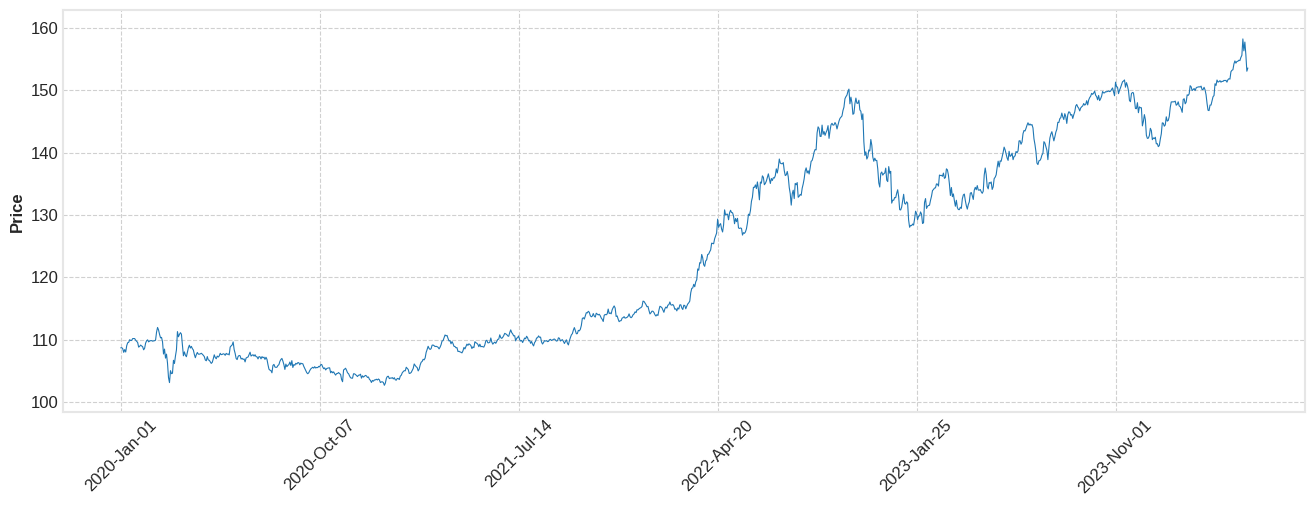

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,108.680000,111.410004,108.629997,108.681000,108.681000,0
2020-01-02,108.713997,108.860001,108.221001,108.712997,108.712997,0
2020-01-03,108.540001,108.551003,107.915001,108.542999,108.542999,0
2020-01-06,107.999001,108.410004,107.921997,107.963997,107.963997,0
2020-01-07,108.411003,108.616997,108.261002,108.405998,108.405998,0
...,...,...,...,...,...,...
2024-04-30,156.313995,157.556000,156.203995,156.313995,156.313995,0
2024-05-01,157.722000,157.981995,157.421005,157.722000,157.722000,0
2024-05-02,155.703995,156.251007,153.494995,155.703995,155.703995,0


In [49]:
start = dt.date(2020, 1, 1)
end = dt.date(2024, 5, 7)

#ticker = '6920.T' # レーザーテック
#ticker = '7735.T' # スクリーン
#ticker = '8035.T' # 東京エレクトロン
#ticker = '^N225'
ticker = 'USDJPY=X'
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [50]:
df = pd.DataFrame({'ds': df0.index, 'y': df0['Close']}).reset_index(drop=True)
df

,ds,y
0,2020-01-01,108.681000
1,2020-01-02,108.712997
2,2020-01-03,108.542999
3,2020-01-06,107.963997
4,2020-01-07,108.405998
...,...,...
1129,2024-04-30,156.313995
1130,2024-05-01,157.722000
1131,2024-05-02,155.703995
1132,2024-05-03,153.044998


In [51]:
m = Prophet()
m.fit(df)

11:35:33 - cmdstanpy - INFO - Chain [1] start processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1494,2025-05-02
1495,2025-05-03
1496,2025-05-04
1497,2025-05-05
1498,2025-05-06


In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
1485,2025-04-23,173.417753,147.093152,200.750746
1486,2025-04-24,173.503863,147.071290,200.449665
1487,2025-04-25,173.543339,147.072219,200.294221
1488,2025-04-26,170.116300,144.370087,196.582313
1489,2025-04-27,170.218175,143.867908,197.632258
1490,2025-04-28,173.832404,147.146270,200.730089
1491,2025-04-29,174.002349,146.727147,201.161032
1492,2025-04-30,174.122738,147.393438,200.829091
1493,2025-05-01,174.188901,146.368292,201.331594
1494,2025-05-02,174.204849,146.763817,201.996987


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


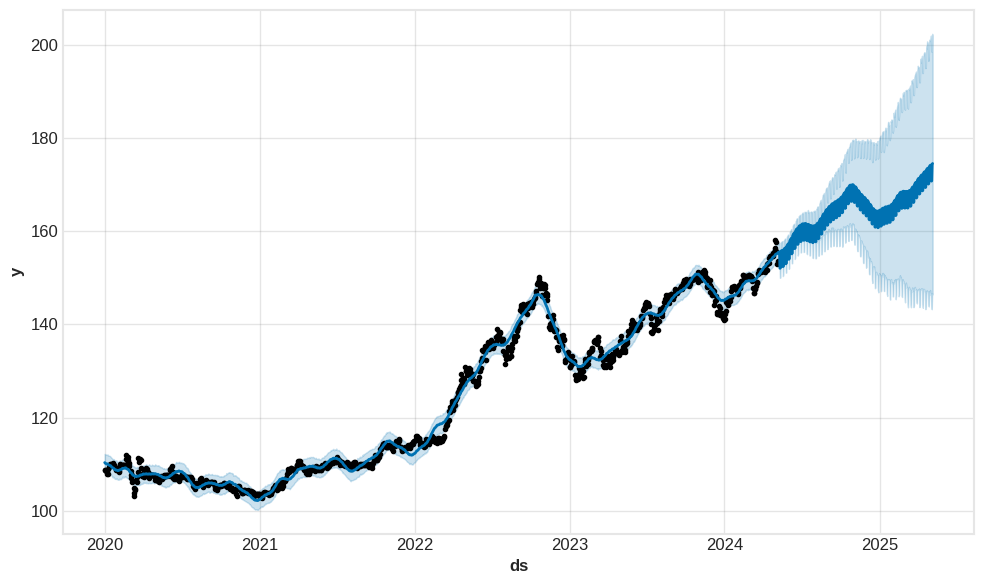

In [54]:
fig1 = m.plot(forecast)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

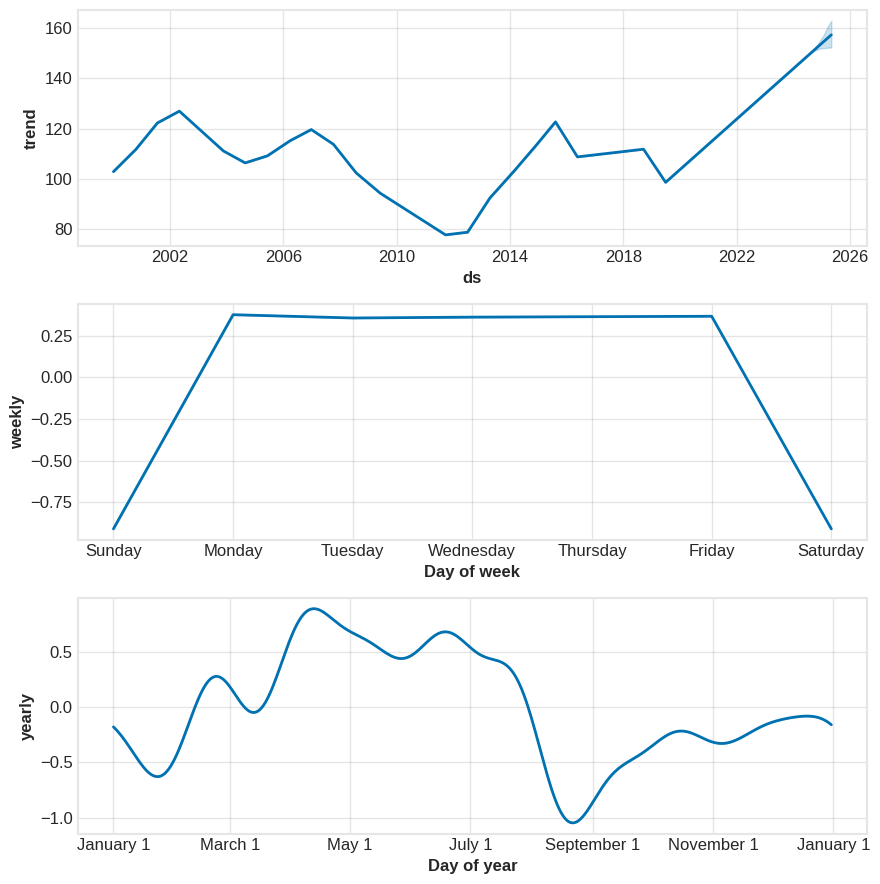

In [48]:
fig2 = m.plot_components(forecast)